In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import jieba
import jieba.analyse
from collections import Counter
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/生活/#12【谷阿莫Life】什麼電影害我在深山裡砍樹？.csv')
data

,comment_id,comment_name,comment_text,comment_likeCount,comment_datatime
0,Ugyoyo__z1qoMq3g27N4AaABAg,滴妹,大家新年快樂！願大家鼠年都能福氣滿滿🧧也把這個福氣分享給大家㊗️🐭,3482,2020/1/31
1,Ugx1Sc8B_Bq1TUI9-kt4AaABAg,Yoyo,好棒！有中奬就是開心～能見好就收，真的是很睿智的抉擇！👍👍👍,0,2022/10/27
2,UgyiUDX_3kumaIUA79p4AaABAg,soku阿哲,謝謝演算法讓我知道滴妹兩年前刮出一萬塊,0,2022/10/8
3,UgxuvA2wFn_a_H70-T54AaABAg,卡此語泡菜套餐,演算法。,0,2022/8/30
4,Ugy7GFdtlLkOGcvBXXR4AaABAg,弘喵,厲害，好運很幸運<br>滴妹手氣一流~,0,2022/6/2
...,...,...,...,...,...
1228,UgwekRU269doy_H4o2B4AaABAg,賴亭羽,終於趕上了~,0,2020/1/31
1229,Ugxkt0jYgVtA8gb6PSB4AaABAg,李依靜,報到,0,2020/1/31
1230,UgyxoYLUgx3iKy4Tgdp4AaABAg,Evelyn,First comment😋,0,2020/1/31
1231,UgxaFimm1qwQO6ybc_x4AaABAg,Wakanda Forever,果然滴妹是幸運女神~扣稅完快八千(厲害餒),0,2020/1/31


In [ ]:
data['seg']=''

In [ ]:
#jieba.set_dictionary(WORDS_PATH)
#jieba.analyse.set_stop_words('.txt')
index= 0
for document in data['comment_text']:
  seg_list=jieba.analyse.extract_tags(document,150)
  data['seg'].iloc[index]=seg_list
  index+=1


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.789 seconds.
DEBUG:jieba:Loading model cost 0.789 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data.sort_values(by='comment_likeCount', ascending=False)


,comment_id,comment_name,comment_text,comment_likeCount,comment_datatime,seg
0,Ugyoyo__z1qoMq3g27N4AaABAg,滴妹,大家新年快樂！願大家鼠年都能福氣滿滿🧧也把這個福氣分享給大家㊗️🐭,3482,2020/1/31,"[福氣, 大家鼠, 快樂, 滿滿, 這個, 大家, 新年, 分享]"
1182,UgzjRoORVP6OKYhnDAt4AaABAg,阿滴日常,發射光波！！！！大家都來搶好運！！！看到就有喔～與大家分享～～～,2189,2020/1/31,"[發射, 好運, 大家, 光波, 分享, 看到]"
970,UgxLORKP5p73FiW895Z4AaABAg,Jia,阿姨好好笑XDDD<br>阿滴：有中一萬<br>阿姨：(口氣立馬轉變驚訝)真假的！紅豆泥！<...,595,2020/1/31,"[br, 阿姨, 好好笑, XDDD, 阿滴, 一萬, 口氣, 立馬, 轉變, 驚訝, 紅豆..."
1025,UgzMkHegv2mmKyZWcVN4AaABAg,新保生活關懷股份有限公司-張軒慈,老闆娘原本不以為意，結果聽到1萬，紅豆泥都來了～～～😂,589,2020/1/31,"[為意, 結果, 紅豆, 不以, 原本]"
271,Ugzjcq1Io0C9YNgWyad4AaABAg,the劉沛,以後都不要給哥哥刮刮樂好了<br>滴妹什麼時候要請我吃拉麵? 😂,544,2020/2/4,"[以後都, 刮樂, br, 滴妹, 什麼, 時候, 哥哥, 不要]"
...,...,...,...,...,...,...
447,UgxxCpLxOqH-Iysfh5N4AaABAg,J un,我喜歡滴妹戴這種眼鏡，超好看的<br>只要有妹子戴這種眼鏡我都會看他很久,0,2020/2/2,"[這種, 眼鏡, 喜歡, 滴妹, br, 妹子, 好看, 只要]"
448,Ugweh4TWSnf_pJDzSkV4AaABAg,偉哥Willie,我也要去買14了👌👌,0,2020/2/2,[14]
449,Ugwij3sPOWrFDZ2hTIt4AaABAg,顏仲威,板娘的ほんとに下一秒哇耖,0,2020/2/2,"[板娘, 一秒]"
450,Ugw1Q7Whwl4ZoZd8pZp4AaABAg,H ank,滴妹是隨便選一張刮刮樂 還是有挑特別編號的那張呢？ 我好奇,0,2020/2/2,"[滴妹, 隨便, 選一張, 刮樂, 還是, 挑特別, 編號, 好奇]"


In [ ]:
like = data[data['comment_likeCount'].astype(int) > 10]
like

,comment_id,comment_name,comment_text,comment_likeCount,comment_datatime,seg
0,Ugyoyo__z1qoMq3g27N4AaABAg,滴妹,大家新年快樂！願大家鼠年都能福氣滿滿🧧也把這個福氣分享給大家㊗️🐭,3482,2020/1/31,"[福氣, 大家鼠, 快樂, 滿滿, 這個, 大家, 新年, 分享]"
97,UgwMyKE5Ill6gmJ6agB4AaABAg,Hoi On Leung,滴妹，我是香港的粉絲，我也很愛玩刮刮樂。好刺激耶。怎麼那麼好中？,27,2020/2/18,"[滴妹, 粉絲, 愛玩, 刮樂, 怎麼, 那麼, 香港, 刺激]"
147,UgwY0WcjYykLeRMJ4ph4AaABAg,Yian,我看了好多滴妹的影片<br>發現<br>她運氣真的很好欸......,11,2020/2/8,"[br, 滴妹, 發現, 運氣, ......, 好多, 影片, 真的]"
239,UgxCrLSfvUZ53b32lrd4AaABAg,su明達,我一開始買200元的中300元，300元再拿去換300元的，中了7500，但是扣完稅金變59...,27,2020/2/5,"[300, 一開始, 200, 去換, 7500, 完稅, 金變, 5970, 稅金, 中越..."
271,Ugzjcq1Io0C9YNgWyad4AaABAg,the劉沛,以後都不要給哥哥刮刮樂好了<br>滴妹什麼時候要請我吃拉麵? 😂,544,2020/2/4,"[以後都, 刮樂, br, 滴妹, 什麼, 時候, 哥哥, 不要]"
...,...,...,...,...,...,...
1211,Ugx6t8ltBaDDydQbLXt4AaABAg,陳芝瑩,按小鈴鐺 阿姨懂推薦 哈哈~<br>聽到預算的部分 我就想 阿滴一定會說沒有概念 XDD,129,2020/1/31,"[按小鈴鐺, 推薦, br, 聽到, 預算, 阿滴, XDD, 阿姨, 哈哈, 概念, 部分..."
1213,Ugx0fU_ZIg0SQXZTdCt4AaABAg,小麻糬,原來是滴妹日常<br>我以為是阿滴日常🤣,12,2020/1/31,"[日常, 原來, 滴妹, br, 阿滴]"
1214,Ugzkzip7MkjM74wIRTt4AaABAg,金季,大獎上手❤️,14,2020/1/31,"[大獎, 上手]"
1217,UgwuD_JWV7z4FYFQiuV4AaABAg,阿丁,What’s up! 滴妹哈囉😆恭喜阿滴突破第一次哈哈<br>(滴妹一直中時看鏡頭好可愛&g...,241,2020/1/31,"[滴妹, 阿滴, br, 好爽, What, up, 中時, 看鏡頭, gt, lt, 開心..."


In [ ]:
dataseg_list =like['seg'].tolist()
type(dataseg_list)

list

In [ ]:
dataseg_list

[['福氣', '大家鼠', '快樂', '滿滿', '這個', '大家', '新年', '分享'],
 ['滴妹', '粉絲', '愛玩', '刮樂', '怎麼', '那麼', '香港', '刺激'],
 ['br', '滴妹', '發現', '運氣', '......', '好多', '影片', '真的'],
 ['300', '一開始', '200', '去換', '7500', '完稅', '金變', '5970', '稅金', '中越', '但是'],
 ['以後都', '刮樂', 'br', '滴妹', '什麼', '時候', '哥哥', '不要'],
 ['href',
  'https',
  'www',
  'youtube',
  'com',
  'watch',
  'FRLeZM',
  'ePB4',
  'amp',
  '13m01s',
  '13',
  '01',
  '給滴妹',
  'XDDD',
  '全部',
  '所有'],
 ['br',
  '一個',
  '博奕',
  '每個',
  '家裡',
  '總會',
  '特別',
  '財運',
  '滴妹',
  '東西',
  '多的獎',
  '幾次',
  '這樣',
  '常往',
  '你們',
  '了獎',
  '重點',
  '收手',
  '有福',
  '恭喜',
  '平常',
  '不宜',
  '成本',
  '只要',
  '一次',
  '知道'],
 ['刮中',
  '100000',
  '結果',
  '20000',
  '我為',
  '什麼',
  '時候',
  '那麼',
  '幸運',
  '我哥',
  '前年',
  '知道'],
 ['別人',
  '大獎',
  '開心',
  'br',
  '滴妹',
  '阿滴',
  '恭喜',
  '就算',
  '看到',
  '一次',
  '只是',
  '自己',
  '可以'],
 ['收稅', '真令人', '可惜', '感到', '看到'],
 ['br',
  '阿滴',
  '滴妹',
  '公仔',
  '交給',
  '我們',
  '還剩',
  '......',
  '珍奶',
  '魯夫',
  '.......',
  'XD'

In [ ]:
flat =[x for sublist in dataseg_list for x in sublist]
diction =Counter(flat)

In [ ]:
diction.keys()

dict_keys(['福氣', '大家鼠', '快樂', '滿滿', '這個', '大家', '新年', '分享', '滴妹', '粉絲', '愛玩', '刮樂', '怎麼', '那麼', '香港', '刺激', 'br', '發現', '運氣', '......', '好多', '影片', '真的', '300', '一開始', '200', '去換', '7500', '完稅', '金變', '5970', '稅金', '中越', '但是', '以後都', '什麼', '時候', '哥哥', '不要', 'href', 'https', 'www', 'youtube', 'com', 'watch', 'FRLeZM', 'ePB4', 'amp', '13m01s', '13', '01', '給滴妹', 'XDDD', '全部', '所有', '一個', '博奕', '每個', '家裡', '總會', '特別', '財運', '東西', '多的獎', '幾次', '這樣', '常往', '你們', '了獎', '重點', '收手', '有福', '恭喜', '平常', '不宜', '成本', '只要', '一次', '知道', '刮中', '100000', '結果', '20000', '我為', '幸運', '我哥', '前年', '別人', '大獎', '開心', '阿滴', '就算', '看到', '只是', '自己', '可以', '收稅', '真令人', '可惜', '感到', '公仔', '交給', '我們', '還剩', '珍奶', '魯夫', '.......', 'XD', '多不多', '所剩', '情境', '保管', '角落', '不多', '生物', '多少', '4m58s', '58', 'OUO', '捕捉', '還能', '這部片', '兩千萬', '不是', 'Why', 'did', 'YouTube', 'recommend', 'me', 'don', 'speak', 'Chinese', '賀喜', '2020', '彩頭', '頻道', '點閱', '攀高', '日常', '年初', '希望', '哈哈哈', '天壤', '聽到', '....', '之別', '那段', '而且', '13m14s', 

In [ ]:
#mask =np.array(Image.open(.PNG))
font ='/content/drive/MyDrive/Colab Notebooks/TaipeiSansTCBeta-Regular.ttf'

In [ ]:
wordcloud =WordCloud(width=1200,height=600,background_color="black",font_path=font)
wordcloud.generate_from_frequencies(diction)

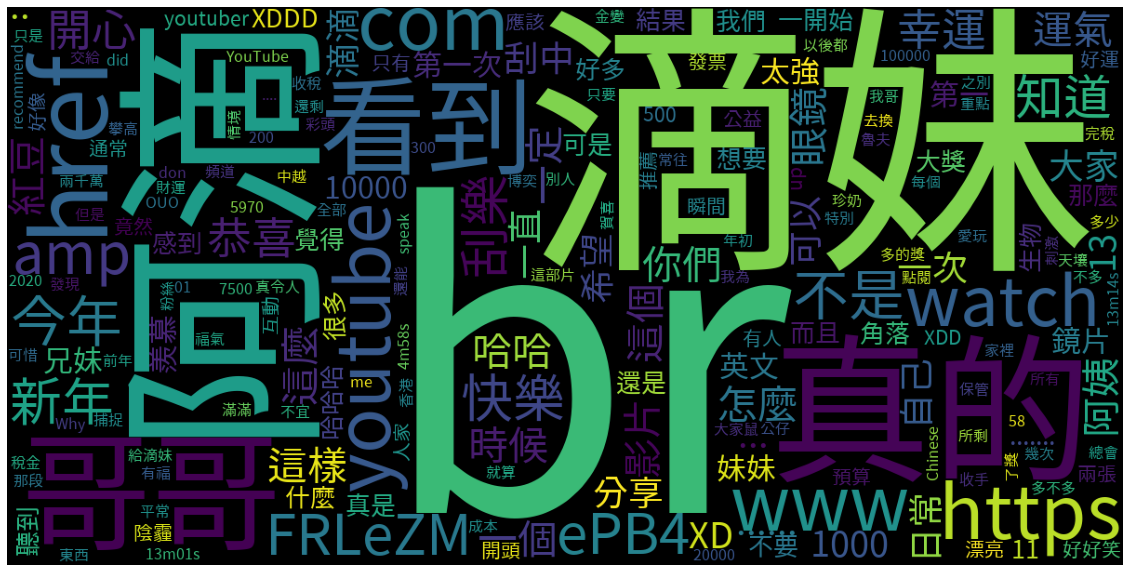

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()